In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
path_fileh5 = "E:\\Servicio\\MEA2\\20211004\\H5\\SPK\\" 

In [2]:
# Carga de los archivos

file_1 = h5py.File(path_fileh5+"CTR20211004s01A_SPK.h5", 'r')
file_2 = h5py.File(path_fileh5+"CTR20211004s01B_SPK.h5", 'r')
file_3 = h5py.File(path_fileh5+"CTR20211004s01C_SPK.h5", 'r')

In [3]:
keys_file1 = list(file_1['Data']['Recording_0']['SegmentStream']['Stream_0'].keys())
keys_file2 = list(file_2['Data']['Recording_0']['SegmentStream']['Stream_0'].keys())
keys_file3 = list(file_3['Data']['Recording_0']['SegmentStream']['Stream_0'].keys())

In [4]:
index = 4
"SegmentData" in keys_file1[index] and not("ts" in keys_file1[index])

True

In [5]:
keys_file1[1]
#file_1['Data']['Recording_0']['SegmentStream']['Stream_0'].keys()

'SegmentData_0'

In [6]:
#Cocatenar archivos

'''Obtener las llaves archivo 1'''

keys_file1_segments = []

for i in range(0, len(keys_file1)):
    if "SegmentData" in keys_file1[i] and not("ts" in keys_file1[i]):
        keys_file1_segments.append(keys_file1[i])
        
'''Obtener las llaves archivo 2'''

keys_file2_segments = []

for i in range(0, len(keys_file2)):
    if "SegmentData" in keys_file2[i] and not("ts" in keys_file2[i]):
        keys_file2_segments.append(keys_file2[i])
        
keys_file3_segments = []

for i in range(0, len(keys_file3)):
    if "SegmentData" in keys_file3[i] and not("ts" in keys_file3[i]):
        keys_file3_segments.append(keys_file3[i])

In [7]:
print("file1 :{} ; file2: {}; file3: {}".format(len(keys_file1_segments),len(keys_file2_segments),len(keys_file3_segments)))
print("Tamaño máximo de números: {}".format(max([len(keys_file1_segments),
                                                len(keys_file2_segments),
                                                len(keys_file3_segments)])))

file1 :110 ; file2: 120; file3: 119
Tamaño máximo de números: 120


## Ejemplo para cocatenar

In [30]:
e0_file1 = np.array(file_1['Data']['Recording_0']['SegmentStream']['Stream_0'][keys_file3_segments[0]]).T
e0_file2 = np.array(file_2['Data']['Recording_0']['SegmentStream']['Stream_0'][keys_file3_segments[0]]).T
e0_file3 = np.array(file_3['Data']['Recording_0']['SegmentStream']['Stream_0'][keys_file3_segments[0]]).T

e0_np = np.concatenate((e0_file1,e0_file2,e0_file3), axis = 0)
print(e0_file1.shape)
print(e0_np[1])
print(e0_np.shape)

(12, 31)
[ -98 -107   -4  118  108  111  469  231   40 -358 -622 -268   42   93
    0  159  118  -20 -187   73   28   -4  -61  122 -221 -165   47   -6
   90  -19   26]
(51, 31)


In [29]:
diccionario = dict()
diccionario[keys_file3_segments[0]] = e0_np
diccionario[keys_file3_segments[1]] = e0_np
print(diccionario)
print(diccionario['SegmentData_0'].shape)

{'SegmentData_0': array([[  89,   41, -124, ...,  279, -223,  -46],
       [ -98, -107,   -4, ...,   90,  -19,   26],
       [  23,   40,  174, ...,   -1,  -29,  139],
       ...,
       [-120, -201,   68, ..., -243,  -67,    2],
       [ -13,   56,  198, ..., -215, -224, -118],
       [  75,   58,  129, ..., -140,   87,   47]]), 'SegmentData_1': array([[  89,   41, -124, ...,  279, -223,  -46],
       [ -98, -107,   -4, ...,   90,  -19,   26],
       [  23,   40,  174, ...,   -1,  -29,  139],
       ...,
       [-120, -201,   68, ..., -243,  -67,    2],
       [ -13,   56,  198, ..., -215, -224, -118],
       [  75,   58,  129, ..., -140,   87,   47]])}
(51, 31)


## Cocatenar Archivos

In [82]:
#Ya que 120 es el número máximo de electrodos
#sabemos que en al menos un archivo hay registros en todo los electrodos

'''Cocatenar archivos'''

electrodes = dict()

for i in range(0, len(keys_file2_segments)):
    print("e: {}, index: {}".format(keys_file2_segments[i], i))
    
    # ARCHIVO 1
    try:
        e_file1_temp = np.array(file_1['Data']['Recording_0']['SegmentStream']['Stream_0'][keys_file2_segments[i]]).T
    except KeyError:
        e_file1_temp = np.array([])
    #ARCHIVO 2
    try:
        e_file2_temp = np.array(file_2['Data']['Recording_0']['SegmentStream']['Stream_0'][keys_file2_segments[i]]).T
    except KeyError:
        e_file2_temp = np.array([])
    #ARCHIVO 3
    try:
        e_file3_temp = np.array(file_3['Data']['Recording_0']['SegmentStream']['Stream_0'][keys_file2_segments[i]]).T
    except KeyError:
        e_file3_temp = np.array([])
        
    args=[e_file1_temp,e_file2_temp,e_file3_temp]
    empty_args = []
    
    #Ver que arreglos estan vacíos y guardar su indice en la lista "empty_args"
    for j in range(0,len(args)):
        if len(args[j])==0: #La variable está vacía
            empty_args.append(j)

    for k in range(len(empty_args)-1,-1,-1): # for recorre el arreglo del último elemento al primero
        # Para borrar indices que si existen
        args.pop(empty_args[k])
    if i == 14:
        print(len(args))
        
    e_np_temp = np.concatenate(args, axis = 0)
    
    electrodes[keys_file2_segments[i]] = e_np_temp
    

e: SegmentData_0, index: 0
e: SegmentData_1, index: 1
e: SegmentData_10, index: 2
e: SegmentData_100, index: 3
e: SegmentData_101, index: 4
e: SegmentData_102, index: 5
e: SegmentData_103, index: 6
e: SegmentData_104, index: 7
e: SegmentData_105, index: 8
e: SegmentData_106, index: 9
e: SegmentData_107, index: 10
e: SegmentData_108, index: 11
e: SegmentData_109, index: 12
e: SegmentData_11, index: 13
e: SegmentData_110, index: 14
3
e: SegmentData_111, index: 15
e: SegmentData_112, index: 16
e: SegmentData_113, index: 17
e: SegmentData_114, index: 18
e: SegmentData_115, index: 19
e: SegmentData_116, index: 20
e: SegmentData_117, index: 21
e: SegmentData_118, index: 22
e: SegmentData_119, index: 23
e: SegmentData_12, index: 24
e: SegmentData_13, index: 25
e: SegmentData_14, index: 26
e: SegmentData_15, index: 27
e: SegmentData_16, index: 28
e: SegmentData_17, index: 29
e: SegmentData_18, index: 30
e: SegmentData_19, index: 31
e: SegmentData_2, index: 32
e: SegmentData_20, index: 33
e: Se

In [93]:
len(electrodes)
for key in electrodes.keys():
    try:
        tam_1 = len(np.array(file_1['Data']['Recording_0']['SegmentStream']['Stream_0'][key]).T)
    except KeyError:
        tam_1 = 0
        
    try:
        tam_2 = len(np.array(file_2['Data']['Recording_0']['SegmentStream']['Stream_0'][key]).T)
    except KeyError:
        tam_2 = 0
        
    try:
        tam_3 = len(np.array(file_3['Data']['Recording_0']['SegmentStream']['Stream_0'][key]).T)
    except KeyError:
        tam_3 = 0
    print("{:<16}-> F1: {:<4}, F2: {:<4}, F3: {:<4}, C: {:<4}".format(key,tam_1, tam_2, tam_3, len(electrodes[key])))

SegmentData_0   -> F1: 12  , F2: 19  , F3: 20  , C: 51  
SegmentData_1   -> F1: 3   , F2: 11  , F3: 17  , C: 31  
SegmentData_10  -> F1: 10  , F2: 14  , F3: 5   , C: 29  
SegmentData_100 -> F1: 203 , F2: 159 , F3: 91  , C: 453 
SegmentData_101 -> F1: 115 , F2: 117 , F3: 157 , C: 389 
SegmentData_102 -> F1: 9   , F2: 27  , F3: 28  , C: 64  
SegmentData_103 -> F1: 150 , F2: 228 , F3: 368 , C: 746 
SegmentData_104 -> F1: 68  , F2: 79  , F3: 102 , C: 249 
SegmentData_105 -> F1: 114 , F2: 69  , F3: 15  , C: 198 
SegmentData_106 -> F1: 58  , F2: 59  , F3: 79  , C: 196 
SegmentData_107 -> F1: 73  , F2: 136 , F3: 158 , C: 367 
SegmentData_108 -> F1: 118 , F2: 72  , F3: 32  , C: 222 
SegmentData_109 -> F1: 14  , F2: 63  , F3: 49  , C: 126 
SegmentData_11  -> F1: 0   , F2: 3   , F3: 3   , C: 6   
SegmentData_110 -> F1: 43  , F2: 58  , F3: 99  , C: 200 
SegmentData_111 -> F1: 3   , F2: 32  , F3: 33  , C: 68  
SegmentData_112 -> F1: 14  , F2: 34  , F3: 78  , C: 126 
SegmentData_113 -> F1: 5   , F2

In [100]:
##Generar un archivo PKL
import pickle 

# Escritura en modo binario, vacía el fichero si existe
electrodes_file = open('CTR20211004s01.pckl','wb')
# Escribe la colección en el fichero 
pickle.dump(electrodes, electrodes_file) 
electrodes_file.close()

3564


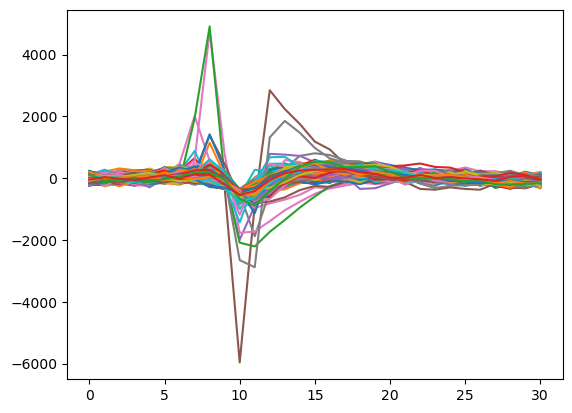

In [98]:
plt.plot(electrodes['SegmentData_68'].T)
print(len(electrodes['SegmentData_68']))

In [76]:
'''Prueba cocatenar arreglos con arreglos vacíos'''
arreglo1 = np.array([[0,1,2,3],[1,1,1,1]])
arreglo2 = np.array([[4,5,6,7],[2,2,2,2]])
vacio = np.array([])
vacio1 = np.array([])
vacio2 = np.array([])

args = [arreglo1,arreglo2,vacio, vacio1, vacio2] #Esto es una tupla
args2 = []

for i in range(0,len(args)):
    print(args[i])
    if len(args[i])==0:
        print("La variable está vacía")
        args2.append(i)
        #arreglos_vacios.append(args[i].name)

print("Lista de variables vacías: ")
print(args2)
print("")
for i in range(len(args2)-1,-1,-1):
    print(args2[i])
    args.pop(args2[i])
    
    
#Lista de variables sin varibles vacías
for i in range(0,len(args)):
    print(args[i])
#junto = np.concatenate((arreglo1,vacio,arreglo2),axis=0)

'''for i in range(0,len(args)):
    print(args[i])

print("")
args.pop(len(args)-1)
for i in range(0,len(args)):
    print(args[i])'''

junto = np.concatenate(args,axis=0)

print("")
print(junto)

[[0 1 2 3]
 [1 1 1 1]]
[[4 5 6 7]
 [2 2 2 2]]
[]
La variable está vacía
[]
La variable está vacía
[]
La variable está vacía
Lista de variables vacías: 
[2, 3, 4]

4
3
2
[[0 1 2 3]
 [1 1 1 1]]
[[4 5 6 7]
 [2 2 2 2]]

[[0 1 2 3]
 [1 1 1 1]
 [4 5 6 7]
 [2 2 2 2]]
